In [119]:
import json
import numpy as np
import pandas as pd
from scipy.stats import skew

popularities_by_artist = {}
artists = []

with open("data/popularities.ndjson", "r") as f:
    for line in f:
        l = line.strip()
        if len(l) == 0:
            continue
        
        artist_json = json.loads(l)
        popularities = np.array(artist_json["popularities"])

        if len(popularities) == 0:
            continue

        artists.append({
            "artist": artist_json["name"],
            "top_song": artist_json["most_popular_track"],
            "max" : max(popularities),
            "mean": popularities.mean(),
            "skew": skew(popularities)
        })

        popularities_by_artist[artist_json["name"]] = popularities

artists = pd.DataFrame(artists).sort_values("skew", ascending=False).reset_index().drop(columns="index")

25% quantile of skews: 0.33141475714653584
50% quantile of skews: 0.7624738377243363
75% quantile of skews: 1.2928031810164409
95% quantile of skews: 2.1612131774680736


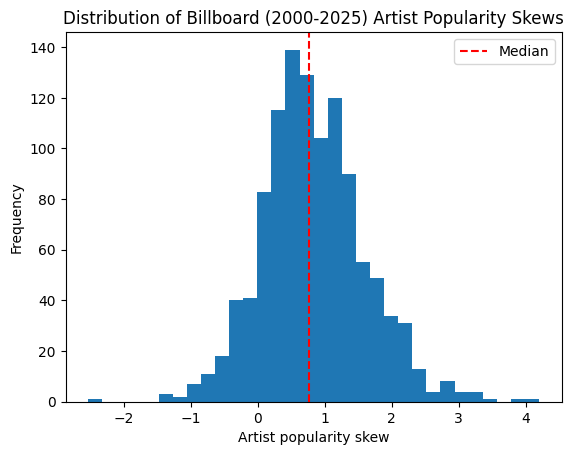

In [120]:
import matplotlib.pyplot as plt

q95_skew = artists["skew"].quantile(0.95)
q75_skew = artists["skew"].quantile(0.75)
q50_skew = artists["skew"].median()
q25_skew = artists["skew"].quantile(0.25)

print(f"25% quantile of skews: {q25_skew}")
print(f"50% quantile of skews: {q50_skew}")
print(f"75% quantile of skews: {q75_skew}")
print(f"95% quantile of skews: {q95_skew}")

plt.hist(artists["skew"], bins=32)
plt.ylabel("Frequency")
plt.xlabel("Artist popularity skew")
plt.axvline(x = q50_skew, color = "red", linestyle="dashed", label="Median")
plt.title("Distribution of Billboard (2000-2025) Artist Popularity Skews")
plt.legend()
plt.show()

In [121]:
def get_q_section(artists: pd.DataFrame, min_q: float = 0, max_q: float = 1) -> pd.DataFrame:
    min_threshold = artists["skew"].quantile(min_q)
    max_threshold = artists["skew"].quantile(max_q)

    return artists[(min_threshold <= artists["skew"]) & (artists["skew"] <= max_threshold)].sort_values("max", ascending=False)

In [148]:
selected_artists = [
    # Highest skew
    "Kidd Kidd",
    # 0.75-0.95 quantile skew
    "French Montana",
    "B.o.B",
    # IQR skew
    "BLACKPINK",
    "Sabrina Carpenter",
    "Tinashe",
    # 0-0.25 quantile skew
    "Justin Bieber",
    "Tate McRae",
    "Kendrick Lamar"
]

def plot_print_artist(artist_name: str):
    artist_data = artists[artists["artist"] == artist_name]
    ranking = artist_data.index[0] + 1
    artist_data = artist_data.iloc[0]
    print(f"--- Artist: {artist_name} ---")
    print(f"Top Song: {artist_data['top_song']} (popularity {artist_data['max']})")
    print(f"Mean popularity: {round(artist_data['mean'], 2)}")
    print(f"Popularity skew: {round(artist_data['skew'], 2)} (#{ranking})")

    popularities = popularities_by_artist[artist_name]

    plt.hist(popularities)
    plt.ylabel("Frequency")
    plt.xlabel("Song popularity")
    plt.title(f"Distribution of {artist_name}'s Song Popularities")
    plt.show()

--- Artist: Kidd Kidd ---
Top Song: Ejected (popularity 30)
Mean popularity: 2.97
Popularity skew: 4.2 (#1)


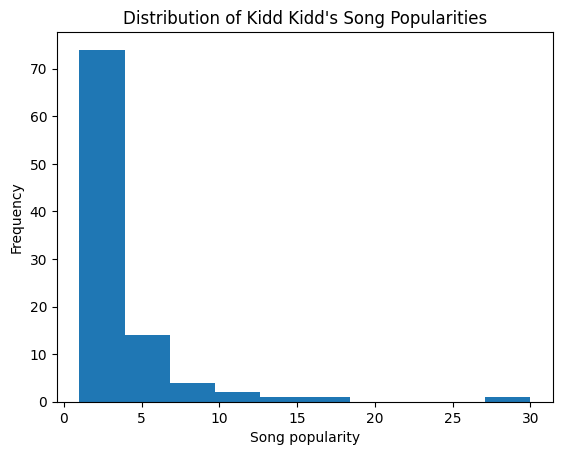

--- Artist: French Montana ---
Top Song: Unforgettable (popularity 84)
Mean popularity: 16.6
Popularity skew: 1.33 (#264)


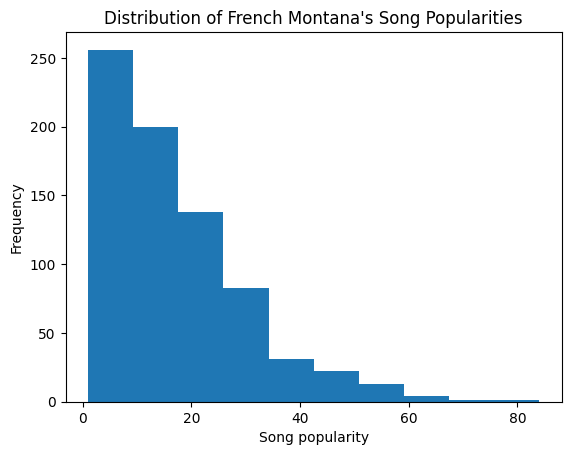

--- Artist: B.o.B ---
Top Song: Airplanes (feat. Hayley Williams of Paramore) (popularity 77)
Mean popularity: 12.63
Popularity skew: 2.02 (#76)


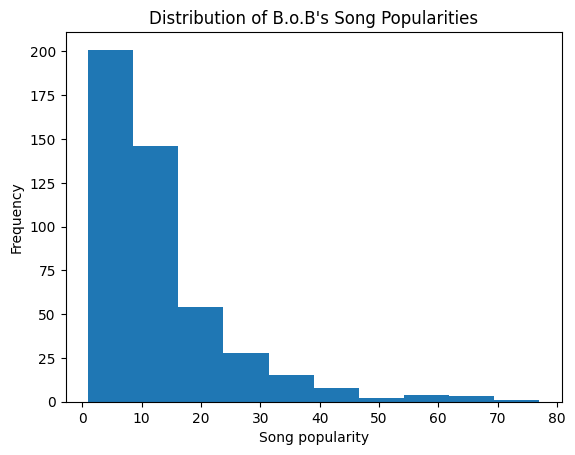

--- Artist: BLACKPINK ---
Top Song: JUMP (popularity 94)
Mean popularity: 46.94
Popularity skew: 0.85 (#511)


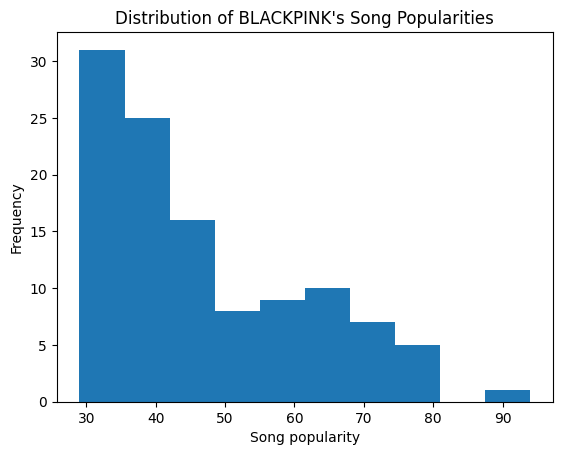

--- Artist: Sabrina Carpenter ---
Top Song: Manchild (popularity 93)
Mean popularity: 50.17
Popularity skew: 0.47 (#752)


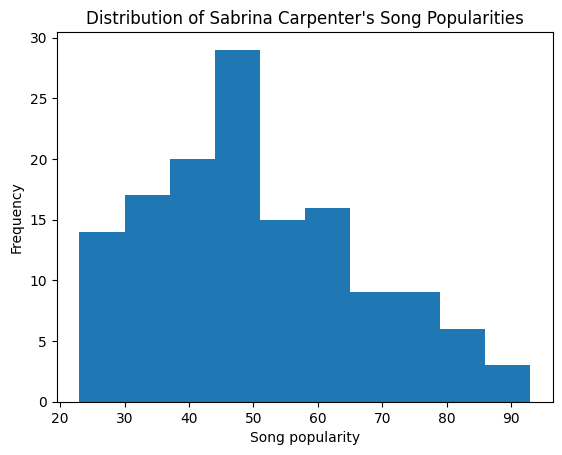

--- Artist: Tinashe ---
Top Song: No Broke Boys (popularity 91)
Mean popularity: 29.33
Popularity skew: 0.7 (#594)


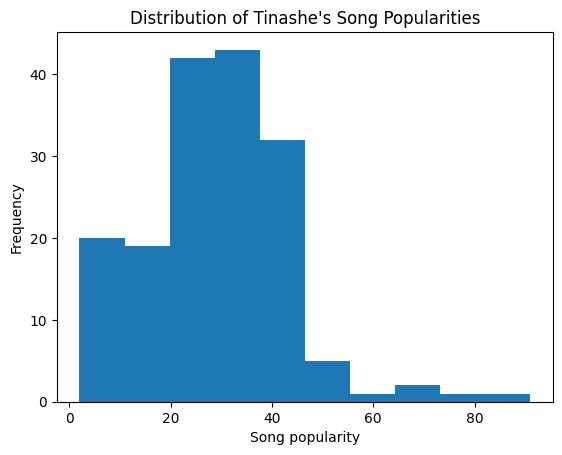

--- Artist: Justin Bieber ---
Top Song: DAISIES (popularity 94)
Mean popularity: 50.11
Popularity skew: -0.23 (#1029)


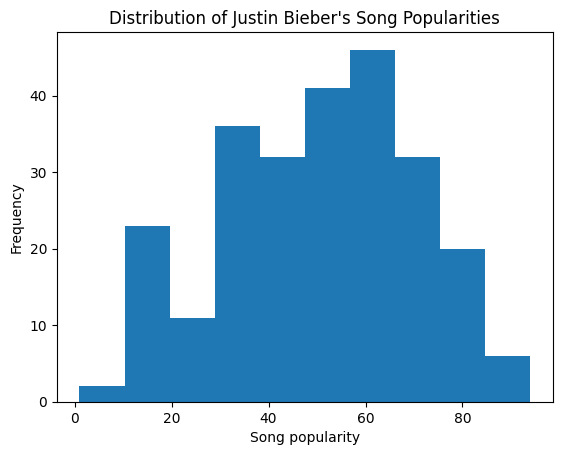

--- Artist: Tate McRae ---
Top Song: Just Keep Watching (From F1® The Movie) (popularity 91)
Mean popularity: 55.71
Popularity skew: -0.38 (#1064)


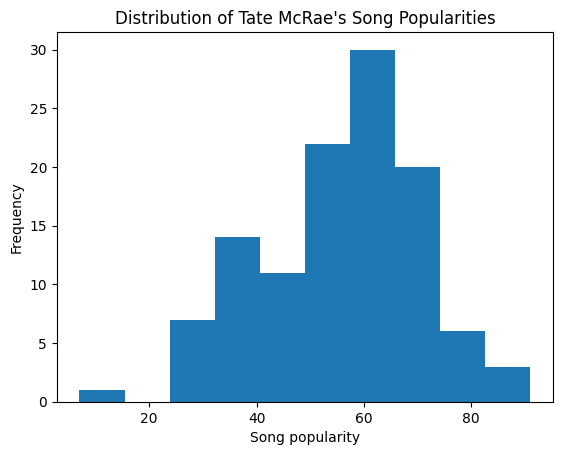

--- Artist: Kendrick Lamar ---
Top Song: All The Stars (with SZA) - From "Black Panther: The Album" (popularity 90)
Mean popularity: 57.59
Popularity skew: -0.61 (#1081)


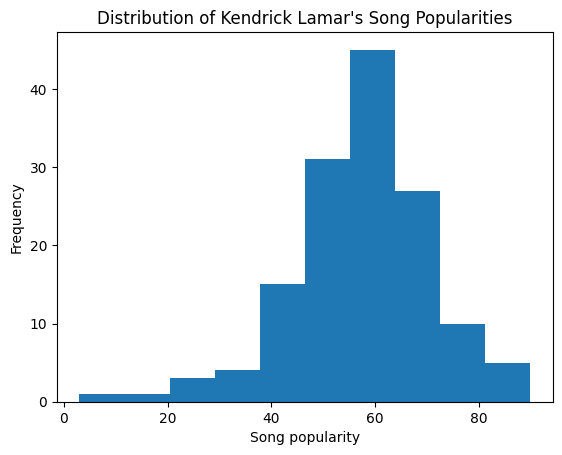

In [149]:
for artist in selected_artists:
    plot_print_artist(artist)